Importing libraries

In [29]:
import numpy as np
import nnfs 
import matplotlib.pyplot as plt
import math
from nnfs.datasets import spiral_data 
from nnfs.datasets import vertical_data
nnfs.init()


Single Neuron

In [30]:
inputs =np.array([1.0, 2.0, 3.0, 2.5])
weights =np.array([0.2, 0.8, 0.5, 1.0])
bias = 2.0 
outputs = np.dot(weights,inputs) + bias
print(outputs)

7.8


Layer of Neuron

In [31]:
inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, -0.87]])
biases = [2.0, 3.0, 0.5]

outputs = np.dot(weights, inputs) + biases
print(outputs)

[ 4.79999995  1.21000004 -1.96499991]


Layer of neuron with batch data

In [32]:
inputs =np.array( [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, -0.87]])
biases = [2.0, 3.0, 0.5]
output_layer = np.dot(inputs,np.array(weights).T) + biases
print(output_layer)

[[ 4.79999995  1.21000004 -1.96499991]
 [ 8.9000001  -1.80999994 -3.27999997]
 [ 1.41000003  1.051       1.41799998]]


Training data

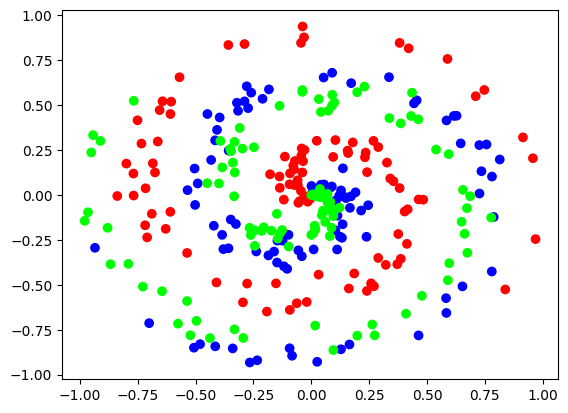

In [33]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Code for generating random data, Assigning weights and class, Building Neuron layer and generating output.

In [34]:
#Creating dense layer class
class Layer_dense:

    #Layer initialization
    def __init__ (self, n_inputs, n_neurons):
        #Weight and biases
        self.weights =0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))

    #Forward pass
    def forward (self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

#Creating a data set
X, y = spiral_data(samples=100, classes=3)

#Creating dense layerwith 2 input features and 3 output values
dense1 = Layer_dense(2,3)

#Performing forward pass
dense1.forward(X)

#Output for 5 columns
print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


ReLU Activation Function Logic code and class

In [35]:
inputs = [0, 2, -1,3.3, -2.7, 1.1, 2.2, -100]
outputs = []

# Method 1
for i in  inputs:
     if i>0 :
         outputs.append(i)
     else :
         outputs.append(0)

print(outputs)

# Method 2
outputs = []
for i in inputs:
     outputs.append(max(0,i))

print(outputs)

# Method 3
outputs = []
outputs = np.maximum(0,inputs)
print(outputs)

#Relu function class
class Activation_ReLU:

    def forward(self, inputs) :
        self.output = np.maximum(0, inputs)


[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]
[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]
[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


Applying ReLU activation function class on dense layer output of spiral data

In [36]:
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_dense(2,3)
activation1 = Activation_ReLU()
dense1.forward(X)
activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


Softmax activation function logic code and class

In [37]:
import math

class Activation_Softmax:

    #Forward pass
    def forward(self, inputs):
        
        #Get unnormalized data
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))

        #Normalized data
        probabilities = exp_values/ np.sum(exp_values, axis = 1, keepdims=True)

        self.output = probabilities    


Applying softmax activation function on dense layer output of spiral data by taking output from ReLU func.

In [38]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_dense(2,3)
dense2 = Layer_dense(3,3)

activation1 = Activation_ReLU()
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print('ReLU Output\n',activation1.output[:5],'\n\n')
print('Softmax output\n',activation2.output[:5])

ReLU Output
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 7.0896655e-05]
 [4.5321434e-07 6.8124551e-05 1.4092476e-04]
 [5.9471018e-05 3.4983153e-04 2.3041150e-05]
 [6.0728122e-05 4.1330911e-04 1.4411760e-04]] 


Softmax output
 [[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.33333343 0.3333333 ]
 [0.33333296 0.33333385 0.33333316]
 [0.33333233 0.33333507 0.33333266]
 [0.33333194 0.33333552 0.33333248]]


Loss in Neural network

Categorical Cross Entropy Loss

Here basic loss function is defined

In [39]:
#BASIC LOSS
Soft = [0.7, 0.1, 0.2]
tar = [1, 0, 0]
loss = 0
for i in range(3):
    curr_loss = -(math.log(Soft[i])*tar[i])
    loss += curr_loss
print(loss)


#BASIC LOSS IN 2D-ARRAY
soft = np.array([[0.7, 0.1, 0.2],
                 [0.1, 0.5, 0.4],
                 [0.02, 0.9,0.02]])
tar = [0, 1, 1]
print(-np.log(soft[range(len(soft)),tar]))



#AVERAGE LOSS IN ONE-HOT METHOD
softmax_outputs = np.array([[0.7, 0.1, 0.2], 
                            [0.1, 0.5, 0.4], 
                            [0.02, 0.9, 0.08]]) 
class_targets = np.array([[1, 0, 0], 
                          [0, 1, 0], 
                          [0, 1, 0]]) 


# Probabilities for target values - 
# only if categorical labels 
if len(class_targets.shape) == 1: 
    correct_confidences = softmax_outputs[ 
        range(len(softmax_outputs)), 
        class_targets 
    ]
    
# Mask values - only for one-hot encoded labels 
elif len(class_targets.shape) == 2: 
    correct_confidences = np.sum(
        softmax_outputs * class_targets,
         axis=1 ) 
# Losses 
neg_log = -np.log(correct_confidences) 
average_loss = np.mean(neg_log) 
print(average_loss) 

# But edge case like np.log(0) are not handled and can result in error

0.35667494393873245
[0.35667494 0.69314718 0.10536052]
0.38506088005216804


Categorical cross entropy loss class which takes data's loss from 'class loss' as parameters for the methods defined in it.

In [40]:
# Common loss class 
class Loss: 
 
    # Calculates the data and regularization losses 
    # given model output and ground truth values 
    def calculate(self, output, y): 
 
        # Calculate sample losses 
        sample_losses = self.forward(output, y) 
 
        # Calculate mean loss 
        data_loss = np.mean(sample_losses) 
 
        # Return loss 
        return data_loss

# Cross-entropy loss 
class Loss_Categorical_cross_entropy(Loss):
 
    # Forward pass 
    def forward(self, y_pred, y_true): 
 
        # Number of samples in a batch 
        samples = len(y_pred) 
 
        # Clip data to prevent division by 0 
        # Clip both sides to not drag mean towards any value 
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) 
 
        # Probabilities for target values - 
        # only if categorical labels 
        if len(y_true.shape) == 1: 
            correct_confidences = y_pred_clipped[ 
                range(samples), 
                y_true 
            ] 
 
        # Mask values - only for one-hot encoded labels 
        elif len(y_true.shape) == 2: 
            correct_confidences = np.sum( 
                y_pred_clipped * y_true, 
                axis = 1
            ) 
 
        # Losses 
        negative_log_likelihoods = -np.log(correct_confidences) 
        return negative_log_likelihoods  
    
loss_function = Loss_Categorical_cross_entropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


Optimizers (Basic without gradients)

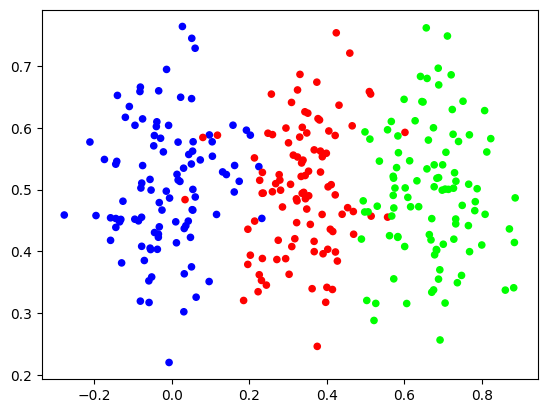

New set of weights found, iteration: 0 loss: 1.0998698 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0977346 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0974786 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0950934 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0938926 acc: 0.3333333333333333
New set of weights found, iteration: 16 loss: 1.0911933 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0873319 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0866592 acc: 0.3333333333333333
New set of weights found, iteration: 23 loss: 1.0858506 acc: 0.49666666666666665
New set of weights found, iteration: 34 loss: 1.0845184 acc: 0.4266666666666667
New set of weights found, iteration: 36 loss: 1.084009 acc: 0.3333333333333333
New set of weights found, iteration: 37 loss: 1.0788571 acc: 0.3333333333333333
New set of weights found, iteration: 39 loss

In [41]:
#Plotting virtual data set from nnfs module
X, y = vertical_data(samples= 100, classes = 3)
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='brg')
plt.show()
# Create dataset 
X, y = vertical_data(samples= 100, classes = 3) 
# Create model 
dense1 = Layer_dense(2, 3)  # first dense layer, 2 inputs 
activation1 = Activation_ReLU() 
dense2 = Layer_dense(3, 3)  # second dense layer, 3 inputs, 3 outputs 
activation2 = Activation_Softmax() 
# Create loss function 
loss_function = Loss_Categorical_cross_entropy()
# Helper variables 
lowest_loss = 9999999  # some initial value 
best_dense1_weights = dense1.weights.copy() 
best_dense1_biases = dense1.biases.copy() 
best_dense2_weights = dense2.weights.copy() 
best_dense2_biases = dense2.biases.copy() 
for iteration in range(10000): 
 
    # Generate a new set of weights for iteration 
    dense1.weights += 0.05 * np.random.randn(2, 3) 
    dense1.biases += 0.05 * np.random.randn(1, 3) 
    dense2.weights += 0.05 * np.random.randn(3, 3) 
    dense2.biases += 0.05 * np.random.randn(1, 3) 
 
    # Perform a forward pass of the training data through this layer 
    dense1.forward(X) 
    activation1.forward(dense1.output) 
    dense2.forward(activation1.output) 
    activation2.forward(dense2.output) 
 
    # Perform a forward pass through activation function 
    # it takes the output of second dense layer here and returns loss 
    loss = loss_function.calculate(activation2.output, y) 
 
    # Calculate accuracy from output of activation2 and targets 
    # calculate values along first axis 
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions==y) 
 
    # If loss is smaller - print and save weights and biases aside 
    if loss < lowest_loss: 
        print('New set of weights found, iteration:', iteration, 
              'loss:', loss, 'acc:', accuracy) 
        best_dense1_weights = dense1.weights.copy() 
        best_dense1_biases = dense1.biases.copy() 
        best_dense2_weights = dense2.weights.copy() 
        best_dense2_biases = dense2.biases.copy() 
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy() 
        dense1.biases = best_dense1_biases.copy() 
        dense2.weights = best_dense2_weights.copy() 
        dense2.biases = best_dense2_biases.copy() 

" This cell of code will contain complete code for Neural network from scratch "

FULL CODE FOR NNFS

In [42]:
import numpy as np
import nnfs 
import matplotlib.pyplot as plt
import math
from nnfs.datasets import spiral_data 
nnfs.init()

#Creating dense layer class
class Layer_dense:

    #Layer initialization
    def __init__ (self, n_inputs, n_neurons):
        #Weight and biases
        self.weights =0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))

    #Forward pass
    def forward (self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

#Creating a data set
X, y = spiral_data(samples=100, classes=3)

#Creating dense layerwith 2 input features and 3 output values
dense1 = Layer_dense(2,3)

#Performing forward pass
dense1.forward(X)


#Creating ReLU activation function class

class Activation_ReLU:

    def forward(self, inputs) :
        self.output = np.maximum(0, inputs)



#Creating Softmax activation funtion class

class Activation_Softmax:

    #Forward pass
    def forward(self, inputs):
        
        #Get unnormalized data
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))

        #Normalized data
        probabilities = exp_values/ np.sum(exp_values, axis = 1, keepdims=True)

        self.output = probabilities   

# Common loss class 
class Loss: 
 
    # Calculates the data and regularization losses 
    # given model output and ground truth values 
    def calculate(self, output, y): 
 
        # Calculate sample losses 
        sample_losses = self.forward(output, y) 
 
        # Calculate mean loss 
        data_loss = np.mean(sample_losses) 
 
        # Return loss 
        return data_loss

# Cross-entropy loss 
class Loss_Categorical_cross_entropy(Loss):
 
    # Forward pass 
    def forward(self, y_pred, y_true): 
 
        # Number of samples in a batch 
        samples = len(y_pred) 
 
        # Clip data to prevent division by 0 
        # Clip both sides to not drag mean towards any value 
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) 
 
        # Probabilities for target values - 
        # only if categorical labels 
        if len(y_true.shape) == 1: 
            correct_confidences = y_pred_clipped[ 
                range(samples), 
                y_true 
            ] 
 
        # Mask values - only for one-hot encoded labels 
        elif len(y_true.shape) == 2: 
            correct_confidences = np.sum( 
                y_pred_clipped * y_true, 
                axis = 1
            ) 
 
        # Losses 
        negative_log_likelihoods = -np.log(correct_confidences) 
        return negative_log_likelihoods  
#Optimizer (No gradient descent) 
lowest_loss = 9999999  # some initial value 
best_dense1_weights = dense1.weights.copy() 
best_dense1_biases = dense1.biases.copy() 
best_dense2_weights = dense2.weights.copy() 
best_dense2_biases = dense2.biases.copy() 
for iteration in range(10000): 
 
    # Generate a new set of weights for iteration 
    dense1.weights += 0.05 * np.random.randn(2, 3) 
    dense1.biases += 0.05 * np.random.randn(1, 3) 
    dense2.weights += 0.05 * np.random.randn(3, 3) 
    dense2.biases += 0.05 * np.random.randn(1, 3) 
 
    # Perform a forward pass of the training data through this layer 
    dense1.forward(X) 
    activation1.forward(dense1.output) 
    dense2.forward(activation1.output) 
    activation2.forward(dense2.output) 
 
    # Perform a forward pass through activation function 
    # it takes the output of second dense layer here and returns loss 
    loss = loss_function.calculate(activation2.output, y) 
 
    # Calculate accuracy from output of activation2 and targets 
    # calculate values along first axis 
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions==y) 
 
    # If loss is smaller - print and save weights and biases aside 
    if loss < lowest_loss: 
        best_dense1_weights = dense1.weights.copy() 
        best_dense1_biases = dense1.biases.copy() 
        best_dense2_weights = dense2.weights.copy() 
        best_dense2_biases = dense2.biases.copy() 
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy() 
        dense1.biases = best_dense1_biases.copy() 
        dense2.weights = best_dense2_weights.copy() 
        dense2.biases = best_dense2_biases.copy() 